#Iris Dataset Visualization and Machine Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline

In [2]:
# load csv data
iris = pd.read_csv("../input/Iris.csv")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [3]:
# change the target from string to int
iris['Species'] = iris['Species'].astype('category')
iris['target'] = pd.Categorical.from_array(iris['Species']).codes
iris['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

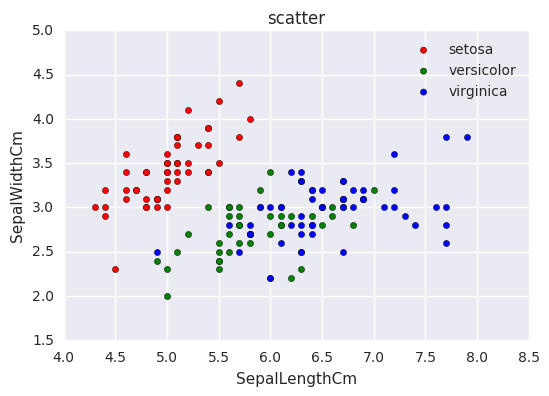

In [4]:
# scatter plot using pandas

ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

In [5]:
# scatter plot using plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [6]:
trace_0 = go.Scatter(
    x = iris[iris.Species=='Iris-setosa']['SepalLengthCm'],
    y = iris[iris.Species=='Iris-setosa']['SepalWidthCm'],
    mode = 'markers',
    marker = dict(
        size = 10,
        symbol = 'x'
    ),
    name = 'setosa'
)

trace_1 = go.Scatter(
    x = iris[iris.Species=='Iris-versicolor']['SepalLengthCm'],
    y = iris[iris.Species=='Iris-versicolor']['SepalWidthCm'],
    mode = 'markers',
    marker = dict(
        size = 10,
        symbol = 'square-dot'
    ),
    name = 'versicolor'
)

trace_2 = go.Scatter(
    x = iris[iris.Species=='Iris-virginica']['SepalLengthCm'],
    y = iris[iris.Species=='Iris-virginica']['SepalWidthCm'],
    mode = 'markers',
    marker = dict(
        size = 10,
        symbol = "circle"
    ),
    name = 'virginica'
)
layout = dict(
    title = 'Scatter Plot',
    xaxis = dict(
        title = 'SepalLengthCm'
    ),
    yaxis = dict(
        title = 'SepalWidthCm'
    )
)
data = [trace_0, trace_1, trace_2]
fig1 = dict(data=data, layout=layout)
iplot(fig1, filename='scatter')

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



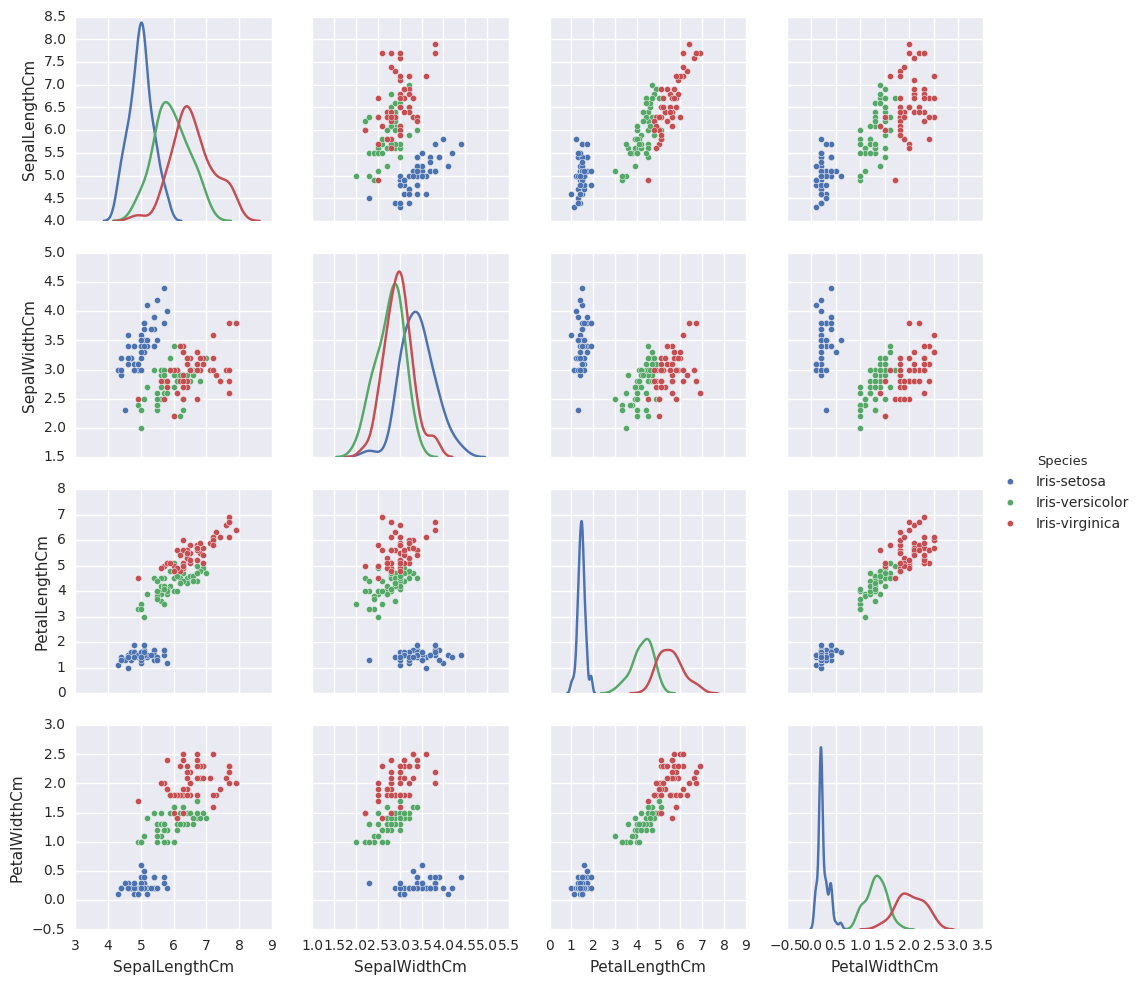

In [7]:
# Paired plot using seaborn
sns.set()
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde")

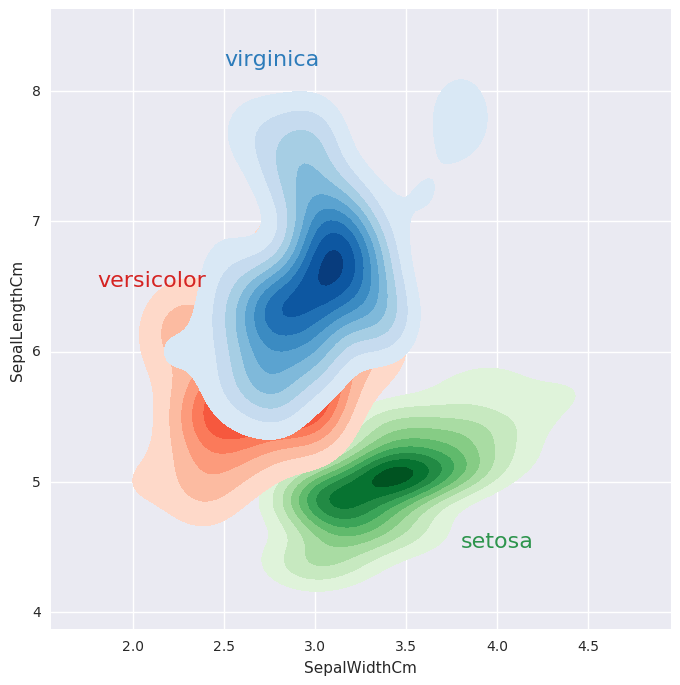

In [8]:
# kdeplot using seaborn
sns.set(style='darkgrid')
setosa = iris.query("Species=='Iris-setosa'")
versicolor = iris.query("Species=='Iris-versicolor'")
virginica = iris.query("Species=='Iris-virginica'")
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(setosa.SepalWidthCm, setosa.SepalLengthCm, cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.SepalWidthCm, versicolor.SepalLengthCm, cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.SepalWidthCm, virginica.SepalLengthCm, cmap="Blues",
          shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(1.8, 6.5, "versicolor", size=16, color=red)
ax.text(3.8, 4.5, "setosa", size=16, color=green)

The iris data have four features, so it's hard to visualize the data in the four dimensions. But we can use the PCA/KPCA or LDA to do dimension reduction. Then visualizing the data in two dimensions.

In [9]:
# PCA and Lda
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

data = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
target = iris['target'].values

pca = PCA(n_components=2)
iris['pca1'] = pca.fit(data).transform(data)[:, 0]
iris['pca2'] = pca.fit(data).transform(data)[:, 1]

lda = LDA(n_components=2)
iris['lda1'] = lda.fit(data, target).transform(data)[:, 0]
iris['lda2'] = lda.fit(data, target).transform(data)[:, 1]

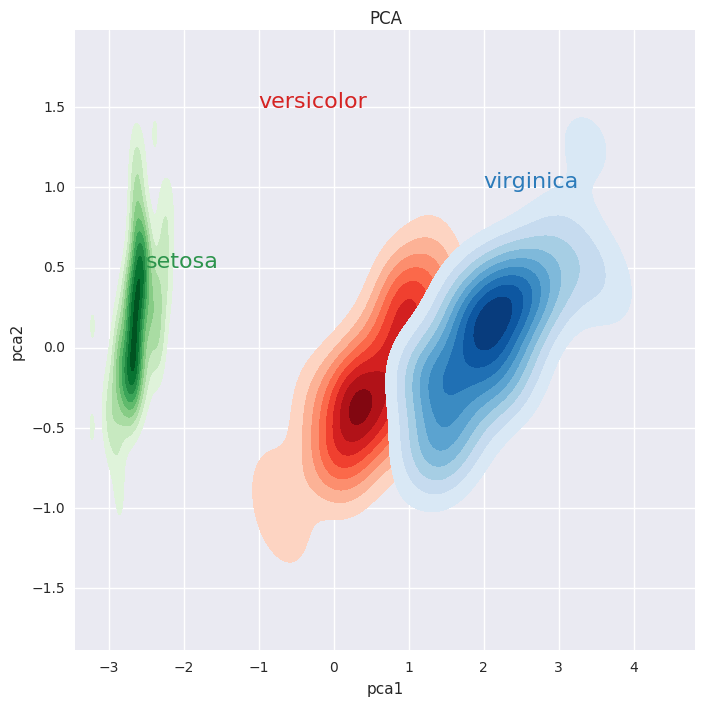

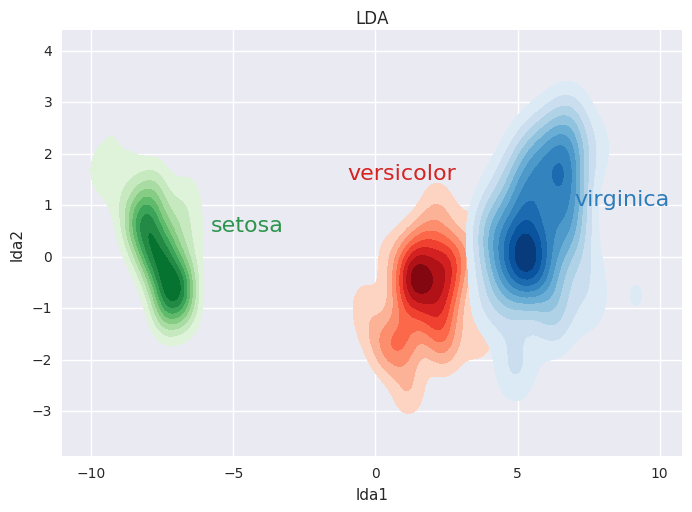

In [10]:
# kdeplot after pca and lda
setosa = iris.query("Species=='Iris-setosa'")
versicolor = iris.query("Species=='Iris-versicolor'")
virginica = iris.query("Species=='Iris-virginica'")
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
plt.figure(1)
ax = sns.kdeplot(setosa.pca1, setosa.pca2, cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.pca1, versicolor.pca2, cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.pca1, virginica.pca2, cmap="Blues",
          shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(2, 1.0, "virginica", size=16, color=blue)
ax.text(-1, 1.5, "versicolor", size=16, color=red)
ax.text(-2.5, 0.5, "setosa", size=16, color=green)
ax.set_title('PCA')

plt.figure(2)
ax1 = sns.kdeplot(setosa.lda1, setosa.lda2, cmap="Greens",
          shade=True, shade_lowest=False)
ax1 = sns.kdeplot(versicolor.lda1, versicolor.lda2, cmap="Reds",
          shade=True, shade_lowest=False)
ax1 = sns.kdeplot(virginica.lda1, virginica.lda2, cmap="Blues",
          shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax1.text(7, 1.0, "virginica", size=16, color=blue)
ax1.text(-1, 1.5, "versicolor", size=16, color=red)
ax1.text(-5.8, 0.5, "setosa", size=16, color=green)
ax1.set_title('LDA')

Now I will use svm and a Neural Network to classify the iris dataset before using sklearn and tensorflow.

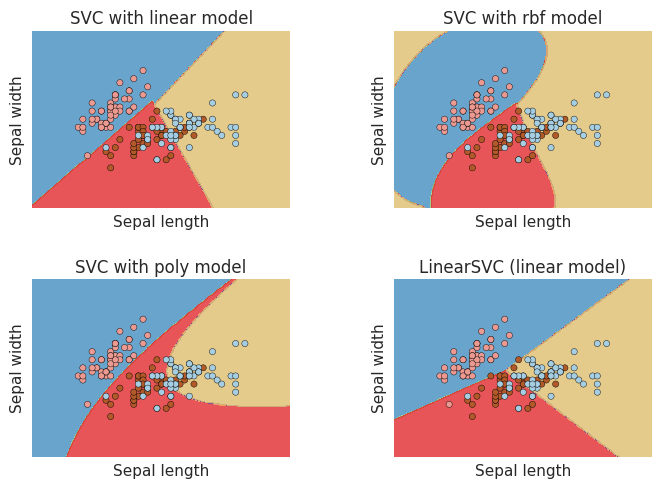

In [11]:
# SVM before LDA
from sklearn import svm
X = iris[['SepalLengthCm', 'SepalWidthCm']].values
y = iris['target'].values

h = 0.02
c = 1.0

# fit model
svc_lin = svm.SVC(kernel='linear', C=c).fit(X, y)
svc_rbf = svm.SVC(kernel='rbf', C=c, gamma=0.7).fit(X, y)
svc_poly = svm.SVC(kernel='poly', C=c, degree=3).fit(X, y)

svc = svm.LinearSVC(C=c).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear model',
          'SVC with rbf model',
          'SVC with poly model',
          'LinearSVC (linear model)']


plt.figure(3)
for i, clf in enumerate((svc_lin, svc_rbf, svc_poly, svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y*100, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


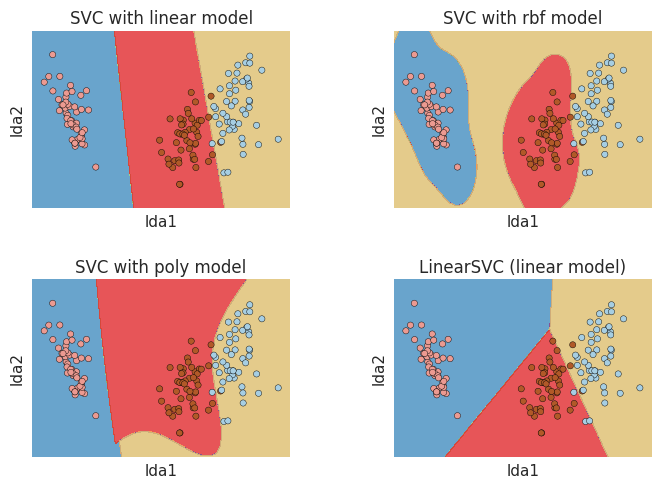

In [12]:
# SVM after LDA
from sklearn import svm
X = iris[['lda1', 'lda2']].values
y = iris['target'].values

h = 0.02
c = 1.0

# fit model
svc_lin = svm.SVC(kernel='linear', C=c).fit(X, y)
svc_rbf = svm.SVC(kernel='rbf', C=c, gamma=0.7).fit(X, y)
svc_poly = svm.SVC(kernel='poly', C=c, degree=3).fit(X, y)

svc = svm.LinearSVC(C=c).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear model',
          'SVC with rbf model',
          'SVC with poly model',
          'LinearSVC (linear model)']

plt.figure(3)
for i, clf in enumerate((svc_lin, svc_rbf, svc_poly, svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y*100, cmap=plt.cm.Paired)
    plt.xlabel('lda1')
    plt.ylabel('lda2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [13]:
# make a complete Neural Network to classify the iris dataset
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

# first divide the dataset into train(130) dataset and test(20) dataset randomly

data = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
target = iris['target'].values

train_data, test_data, train_target, test_target = train_test_split(
     data, target, test_size=20.0/150, random_state=1
)

train_target = np.int64(train_target)
test_target = np.int64(test_target)

feature_columns = [tf.contrib.layers.real_valued_column('', dimension=4)]

# Build 3 layer DNN with 10, 20, 10 units respectively
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="./iris_model")

# Fit model
classifier.fit(x=train_data,
               y=train_target,
               steps=2000)

accuracy_score = classifier.evaluate(x=test_data,
                                     y=test_target)["accuracy"]

print('Accuracy: {0:f}'.format(accuracy_score))

# Classify two new flower samples
new_samples = test_data

y = list(classifier.predict(new_samples, as_iterable=True))

print('Predictions: {}'.format(str(y)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'save_summary_steps': 100, '_task_type': None, 'keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_is_chief': True, '_environment': 'local', '_evaluation_master': '', 'tf_random_seed': None, 'save_checkpoints_secs': 600, 'keep_checkpoint_max': 5, 'save_checkpoints_steps': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f03107b4d68>, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_master': ''}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch

In [14]:
test_data, test_target

(array([[ 5.8,  4. ,  1.2,  0.2],
        [ 5.1,  2.5,  3. ,  1.1],
        [ 6.6,  3. ,  4.4,  1.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 7.9,  3.8,  6.4,  2. ],
        [ 6.3,  3.3,  4.7,  1.6],
        [ 6.9,  3.1,  5.1,  2.3],
        [ 5.1,  3.8,  1.9,  0.4],
        [ 4.7,  3.2,  1.6,  0.2],
        [ 6.9,  3.2,  5.7,  2.3],
        [ 5.6,  2.7,  4.2,  1.3],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 7.1,  3. ,  5.9,  2.1],
        [ 6.4,  3.2,  4.5,  1.5],
        [ 6. ,  2.9,  4.5,  1.5],
        [ 4.4,  3.2,  1.3,  0.2],
        [ 5.8,  2.6,  4. ,  1.2],
        [ 5.6,  3. ,  4.5,  1.5],
        [ 5.4,  3.4,  1.5,  0.4],
        [ 5. ,  3.2,  1.2,  0.2]]),
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0]))

NameError: name 'plt' is not defined

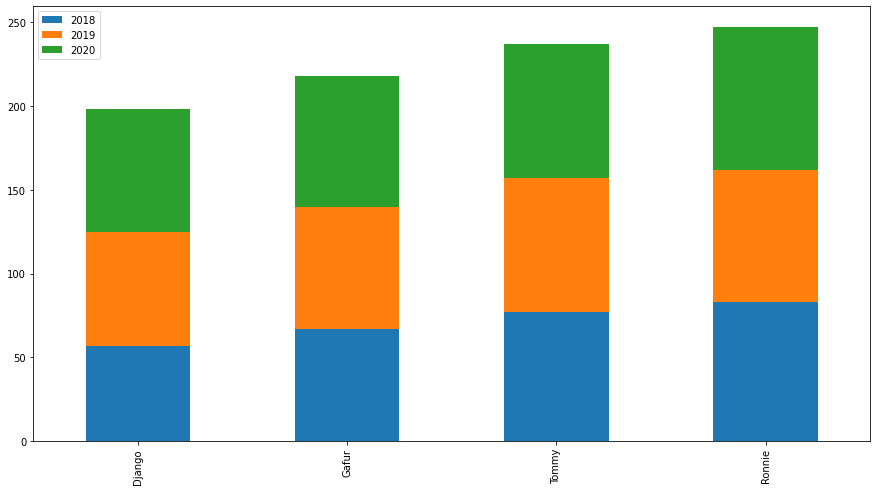

In [1]:
import pandas as pd
plotdata = pd.DataFrame({
    "2018":[57,67,77,83],
    "2019":[68,73,80,79],
    "2020":[73,78,80,85]},
    index=["Django", "Gafur", "Tommy", "Ronnie"])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("FIFA ratings")

plt.xlabel("Footballer")

plt.ylabel("Ratings")